Very simple code: 3 layers object detection.

# This is a 3 fully connected hidden layer network for detecting the images depicting number 1. This is full pipeline with the model, training and evaluation using MNIST data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),                     # Input layer: Flatten the 28x28 images
    Dense(64, activation='relu'),                      # Hidden layer 1
    Dense(64, activation='relu'),                      # Hidden layer 2
    Dense(64, activation='relu'),                      # Hidden layer 3
    Dense(1, activation='sigmoid')                     # Output layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary cross-entropy for binary classification,
              metrics=['accuracy'])

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Convert to binary classification problem (1 vs not-1)
train_labels = (train_labels == 1).astype(int)
test_labels = (test_labels == 1).astype(int)

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - accuracy: 0.9963
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0052 - accuracy: 0.9984


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0191 - val_accuracy: 0.9974
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0160 - val_accuracy: 0.9974
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0181 - val_accuracy: 0.9977
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0143 - val_accuracy: 0.9979
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0186 - val_accuracy: 0.9979
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0214 - val_accuracy: 0.9976
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 8.3972e-04 - accuracy: 0.9997 - val_loss: 0.0186 - val_accur

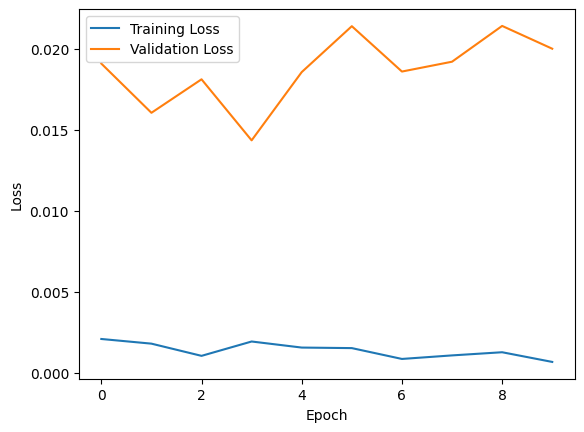

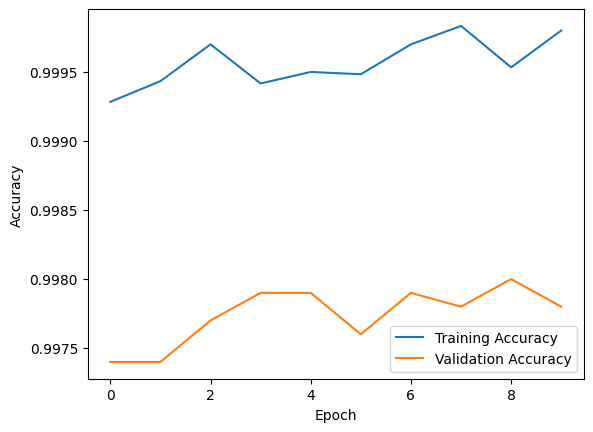

In [ ]:
# Train the model and save the history
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9978
Test accuracy: 0.9977999925613403
